In [59]:
import pickle
import networkx as nx

with open("ubt_data/modules_info.pkl", "rb") as f:
    modules_info = pickle.load(f)
G = nx.read_gexf("ubt_data/graph.gexf")
G_full = nx.read_gexf("ubt_data/graph_full.gexf")

subgraphs = {}
for node in G.nodes():
    predecessors = set(nx.ancestors(G, node))
    successors = set(nx.descendants(G, node))
    related_nodes = predecessors.union(successors, {node})
    subgraph = G.subgraph(related_nodes)
    subgraphs[node] = subgraph
    
import matplotlib.pyplot as plt
def draw(H, node):
    pos = nx.random_layout(H)
    node_colors = ["#0080f0" if n != node else 'red' for n in H.nodes()]
    nx.draw(H, pos, with_labels=True, node_size=150, node_color=node_colors, font_size=8)
    plt.show()
    for n in H.nodes():
        module_data = modules_info.get(n, {})
        description = module_data.get('Desc', "Desc not available")
        print(f"{n}：{description}\n")

def observe(node):
    H = subgraphs[node]
    draw(H, node)
in_degrees = G.in_degree()
sorted_nodes = sorted(in_degrees, key=lambda x: x[1], reverse=True)
print("Nodes sorted by in-degree:")
for node, degree in sorted_nodes:
    print(f"{node}, In-degree: {degree}")

Nodes sorted by in-degree:
AdvancedPreviewScene, In-degree: 9
MeshReductionInterface, In-degree: 8
DetailCustomizations, In-degree: 8
SignalProcessing, In-degree: 8
NetCore, In-degree: 8
GeometryCore, In-degree: 8
AIModule, In-degree: 8
DatasmithCore, In-degree: 8
Networking, In-degree: 7
ClothingSystemRuntimeInterface, In-degree: 7
SourceCodeAccess, In-degree: 7
DirectoryWatcher, In-degree: 7
VariantManagerContent, In-degree: 7
XmlParser, In-degree: 7
DX11, In-degree: 7
TextureBuild, In-degree: 6
CollectionManager, In-degree: 6
SettingsEditor, In-degree: 6
MaterialUtilities, In-degree: 6
MeshMergeUtilities, In-degree: 6
VectorVM, In-degree: 6
MovieSceneTools, In-degree: 6
Messaging, In-degree: 6
OpenSSL, In-degree: 6
InterchangeEngine, In-degree: 6
Persona, In-degree: 6
ClothingSystemRuntimeCommon, In-degree: 6
SkeletonEditor, In-degree: 6
MaterialEditor, In-degree: 6
DirectLink, In-degree: 6
CookOnTheFly, In-degree: 5
SessionServices, In-degree: 5
TraceAnalysis, In-degree: 5
NiagaraC

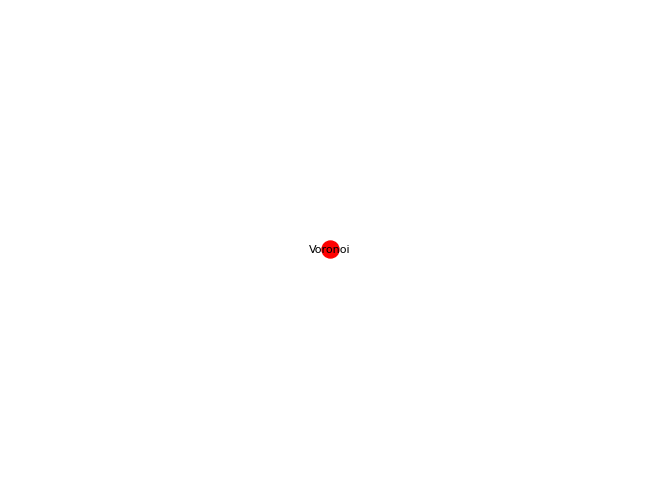

Voronoi：一个第三方的音频编码库的模块，用于处理Vorbis格式的音频数据。| 第三方软件开发包与中间件



In [6]:
observe("Voronoi")

In [12]:
G.subgraph({"RenderCore","RHI","VulkanRHI"})

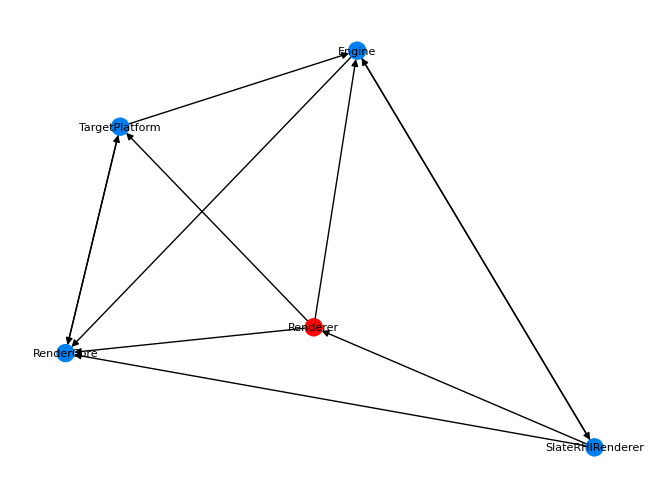

SlateRHIRenderer：SlateRHIRenderer是虚幻引擎中的一个模块，它提供了Slate UI系统的RHI渲染器的功能。Slate是虚幻引擎中用于创建用户界面的工具和框架。该模块允许开发者使用SlateRHIRenderer模块实现基于RHI（Render Hardware Interface）的Slate UI渲染。 | 前端 | 游戏内置GUI

TargetPlatform：提供了对不同目标平台的支持，包括编译、链接和包装游戏的功能 | 平台独立层 | 跨平台支持

RenderCore：Unreal Engine的渲染核心模块，提供了一套通用的、低级的渲染框架，包括渲染管线、着色器管理、渲染命令的封装等。| 低阶渲染器

Engine：游戏引擎的主模块，提供了一系列与游戏相关的功能，包括渲染、物理模拟、音频处理、动画、AI、输入等。此外，还包含了一些通用的游戏类，如玩家、角色、场景管理等。| 核心系统

Renderer：Unreal Engine的渲染模块，用于将游戏世界的可视化表现出来。包括了各种图形特效和优化技术。| 低阶渲染器



In [75]:
draw(G_full.subgraph({"RenderCore","TargetPlatform","Engine","SlateRHIRenderer","Renderer"}),"Renderer")

In [8]:
def bfs_subgraph(start_node, depth):
    # Initialize an empty set for visited nodes and a queue for BFS
    visited = set()
    queue = [(start_node, 0)]  # Queue of tuples (node, current_depth)
    while queue:
        current_node, current_depth = queue.pop(0)
        if current_depth < depth:
            for neighbor in G_full.neighbors(current_node):
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append((neighbor, current_depth + 1))
    subgraph = G_full.subgraph(visited).copy()

    return subgraph

def observe_2(node,depth):
    H = bfs_subgraph(node,depth)
    draw(H, node)

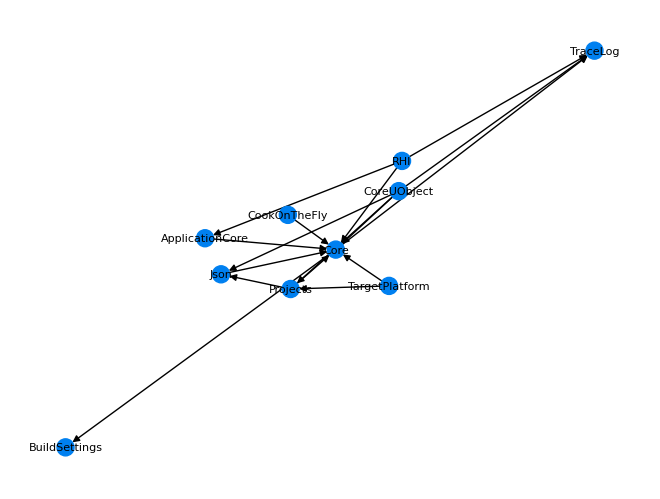

CoreUObject：Unreal Engine的核心对象模块，实现了引擎的对象系统。包括类、对象、接口、枚举、结构等的创建和管理，以及垃圾回收、反射系统、对象序列化等功能。| 核心系统 | 内存分配

Json：提供了对JSON数据的解析和序列化功能，用于读写JSON格式的数据。| 核心系统 | 特定格式支持

CookOnTheFly：CookOnTheFly是虚幻引擎中的一个模块，它提供了即时烹饪（Cook On The Fly）功能。即时烹饪是一种动态生成和加载资源的技术，用于在运行时根据需要加载和处理游戏资源，而不是预先烹饪所有资源。该模块允许开发者在游戏运行时进行资源的即时烹饪和加载，以提高游戏的灵活性和性能。 | 游戏性基础 | 世界载入/串流

BuildSettings：BuildSettings是虚幻引擎中的一个模块，它提供了构建设置和配置的功能。构建设置用于定义和调整项目的构建过程和输出。该模块允许开发者使用BuildSettings模块进行项目的构建设置和配置，以满足特定的构建需求。 | 核心系统 | 引擎配置

Core：Unreal Engine的基础模块，提供了一系列底层工具，包括日志记录、错误处理、内存管理、字符串和数学运算函数等。所有其他模块都依赖于此模块。| 核心系统

TargetPlatform：提供了对不同目标平台的支持，包括编译、链接和包装游戏的功能 | 平台独立层 | 跨平台支持

Projects：负责处理Unreal Engine项目的设置和配置，包括项目文件的管理、项目设置的读取和保存，以及项目的创建和加载。| 核心系统 | 文件I/O

TraceLog：提供了日志追踪功能，用于收集和查看游戏运行时的日志信息。| 性能剖析调试 | 调试用日志

ApplicationCore：提供了应用程序级别的基础设施，如窗口管理、事件处理、定时器等。所有的Unreal Engine应用程序都需要这个模块。| 核心系统

RHI：Render Hardware Interface，Unreal Engine的硬件渲染接口模块，提供了一套抽象的硬件渲染接口，使得引擎可以在不同的硬件和API（如DirectX、OpenGL、Vulkan等）上进行渲染。| 低阶渲染器 | 图形设备接口



In [11]:
observe_2("RenderCore",1)